In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/colab Dataset/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

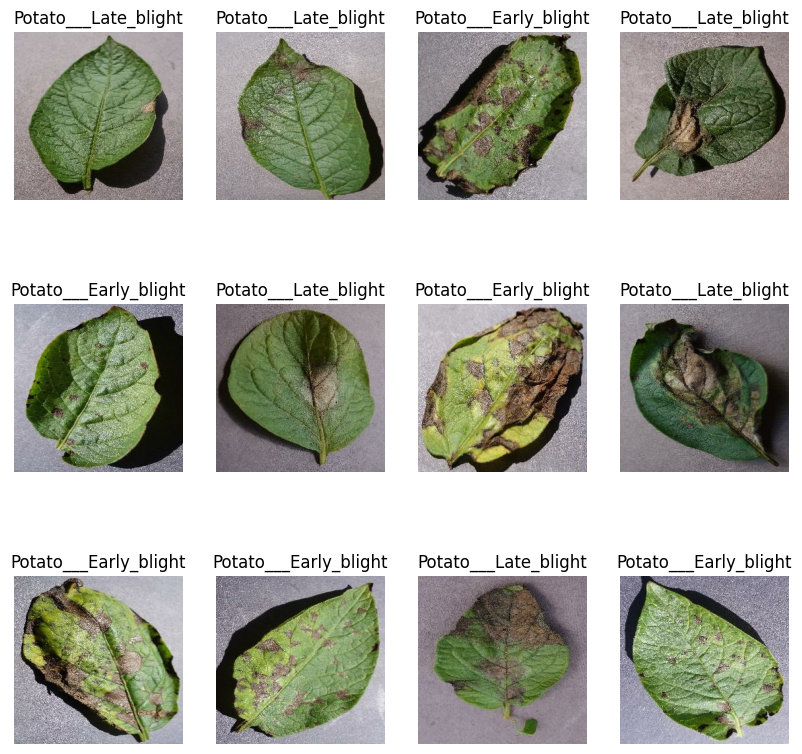

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12) :
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("OFF")

In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
from tensorflow.keras import models

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [24]:
EPOCHS = 50

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 431s 5s/step - loss: 0.9009 - accuracy: 0.4815 - val_loss: 0.8558 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 250s 5s/step - loss: 0.7240 - accuracy: 0.6684 - val_loss: 0.5312 - val_accuracy: 0.8177
Epoch 3/50
54/54 [==============================] - 242s 4s/step - loss: 0.4792 - accuracy: 0.7894 - val_loss: 0.3352 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 255s 5s/step - loss: 0.3318 - accuracy: 0.8733 - val_loss: 0.4298 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 248s 5s/step - loss: 0.3016 - accuracy: 0.8877 - val_loss: 0.3362 - val_accuracy: 0.8802
Epoch 6/50
54/54 [==============================] - 248s 5s/step - loss: 0.1882 - accuracy: 0.9271 - val_loss: 0.1270 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 255s 5s/step - loss: 0.1481 - accuracy: 0.9421 - val_loss: 0.3623 - val_accuracy: 0.8594
Epoch 8/50
54

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 20s 1s/step - loss: 0.0903 - accuracy: 0.9805


In [26]:
scores

[0.09028666466474533, 0.98046875]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.48148149251937866,
 0.6684027910232544,
 0.7893518805503845,
 0.8732638955116272,
 0.8877314925193787,
 0.9270833134651184,
 0.9421296119689941,
 0.9444444179534912,
 0.9403935074806213,
 0.9623842835426331,
 0.9357638955116272,
 0.9444444179534912,
 0.9780092835426331,
 0.9589120149612427,
 0.9739583134651184,
 0.9809027910232544,
 0.9751157164573669,
 0.9872685074806213,
 0.9837962985038757,
 0.984375,
 0.9907407164573669,
 0.9809027910232544,
 0.9745370149612427,
 0.9837962985038757,
 0.9791666865348816,
 0.9826388955116272,
 0.9884259104728699,
 0.9884259104728699,
 0.9884259104728699,
 0.9803240895271301,
 0.9855324029922485,
 0.9878472089767456,
 0.9930555820465088,
 0.9890046119689941,
 0.9872685074806213,
 0.9884259104728699,
 0.9930555820465088,
 0.9837962985038757,
 0.9797453880310059,
 0.9890046119689941,
 0.9907407164573669,
 0.9895833134651184,
 0.9820601940155029,
 0.9936342835426331,
 0.9849537014961243,
 0.9855324029922485,
 0.9878472089767456,
 0.9918981194496155,
 

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

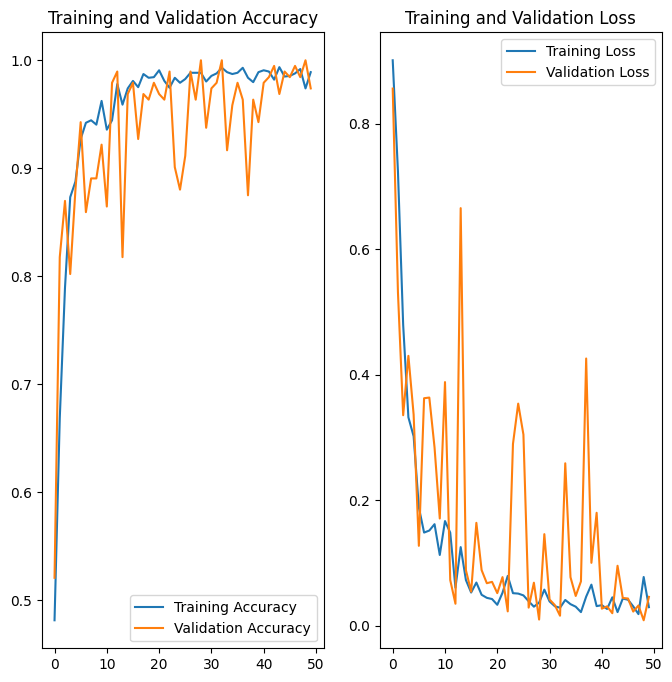

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Potato___Late_blight


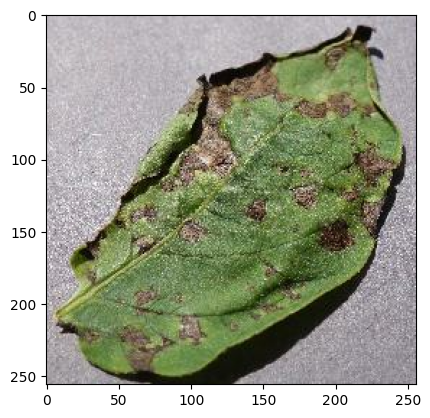

In [33]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print(class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 48ms/step


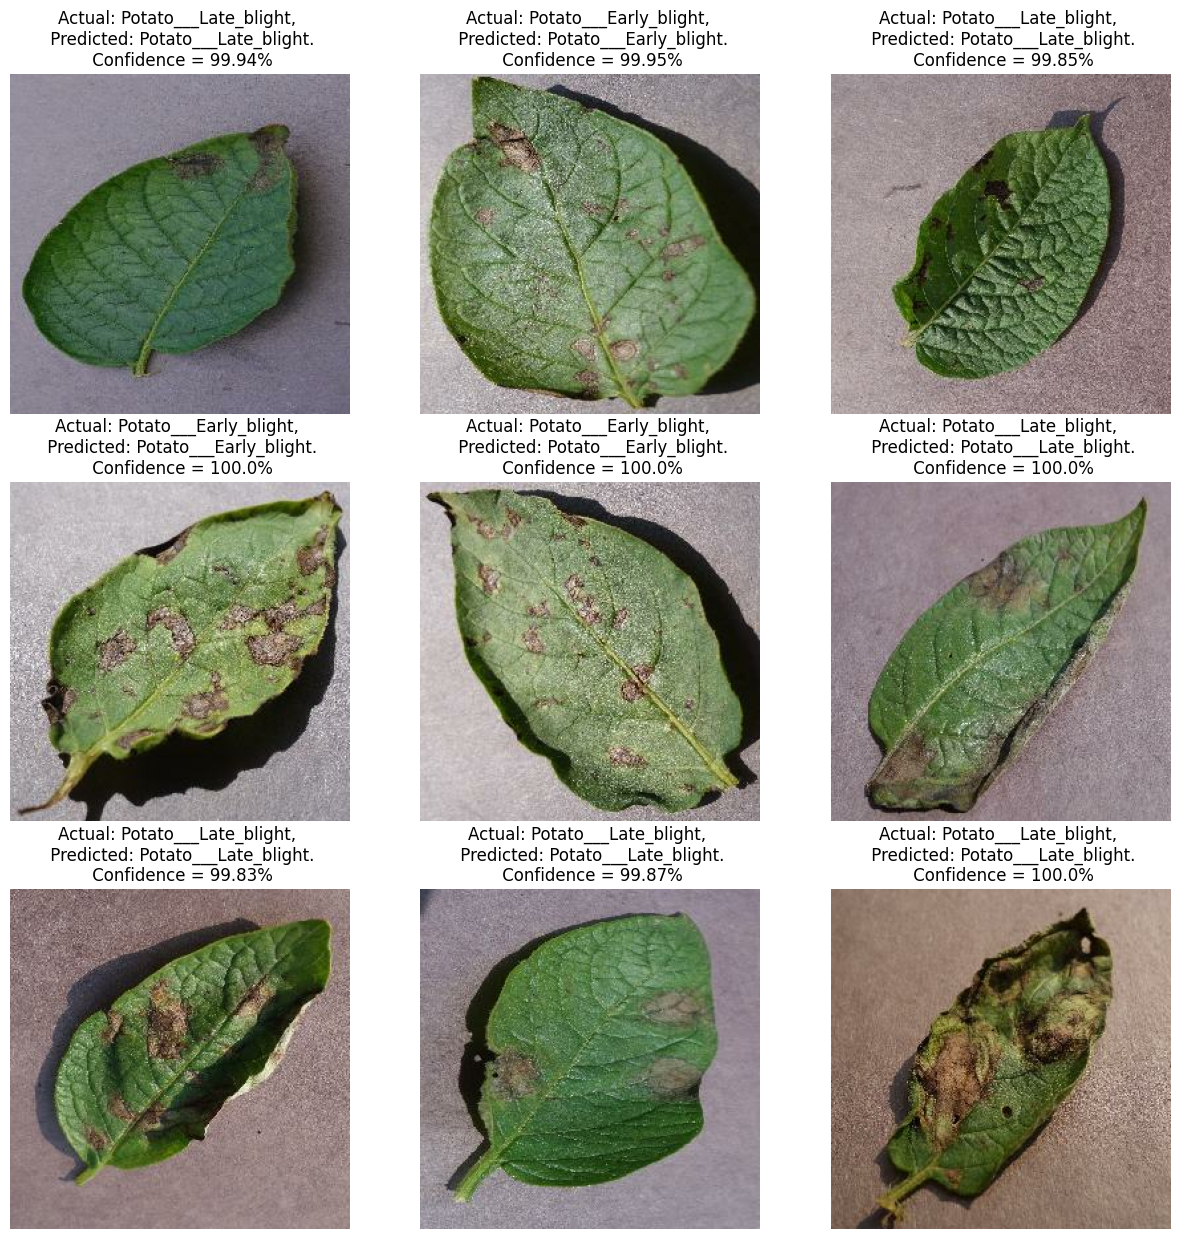

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)  # index starts from 1
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence = {confidence}%")

        plt.axis("off")
plt.show()

In [40]:
import os

# Create the directory if it doesn't exist
save_dir = r"/content/drive/MyDrive/Data Science/Project/patato_disease/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Find the latest model version
model_version = max([int(i) for i in os.listdir(save_dir) + [0]]) + 1

# Save the model
model.save(f"{save_dir}/{model_version}")
